# Import libraries and define the global variables

In [15]:
library(tidyverse)
library(dplyr)
library(plyr)
library(ggplot2)
library(extrafont)
loadfonts()
data_dir = "./DATA"

# Import data

In [3]:
name_files = list.files(path = data_dir ,pattern = "*.csv",full.names = TRUE)
data = ldply(name_files, read_csv)

Parsed with column specification:
cols(
  SESSO = col_character(),
  ID._EPISODIO = col_character(),
  PROBLEMA_PRINCIPALE = col_character(),
  MODALITA_DI_DIMISSIONE = col_character(),
  DATA_ACCETTAZIONE = col_character(),
  DATA_DIMISSIONE = col_character(),
  RESPONSABILE_INVIO = col_character(),
  NASCITA = col_character(),
  LUOGO_NASCITA = col_character(),
  LUOGO_RESIDENZA = col_character(),
  CITTADINANZA = col_character()
)
Parsed with column specification:
cols(
  SESSO = col_character(),
  ID._EPISODIO = col_character(),
  PROBLEMA_PRINCIPALE = col_character(),
  MODALITA_DI_DIMISSIONE = col_character(),
  DATA_ACCETTAZIONE = col_character(),
  DATA_DIMISSIONE = col_character(),
  RESPONSABILE_INVIO = col_character(),
  NASCITA = col_character(),
  LUOGO_NASCITA = col_character(),
  LUOGO_RESIDENZA = col_character(),
  CITTADINANZA = col_character()
)
Parsed with column specification:
cols(
  SESSO = col_character(),
  ID._EPISODIO = col_character(),
  PROBLEMA_PRINCIPALE =

In [4]:
head(data,5)

SESSO,ID._EPISODIO,PROBLEMA_PRINCIPALE,MODALITA_DI_DIMISSIONE,DATA_ACCETTAZIONE,DATA_DIMISSIONE,RESPONSABILE_INVIO,NASCITA,LUOGO_NASCITA,LUOGO_RESIDENZA,CITTADINANZA
M,2019| 021054,10 TRAUMA,1 DIMISSIONE A DOMICILIO CON AFFIDAMENTO AL MEDICO CURANTE,01/04/2019 10.37,01/04/2019 13.04,DECISIONE PROPRIA (DI UN GENITORE SE MINORE),19/05/1981,GRUMO APPULA,GRUMO APPULA,ITALIANA
F,2019| 020978,15 IPERTENSIONE ARTERIOSA,1 DIMISSIONE A DOMICILIO CON AFFIDAMENTO AL MEDICO CURANTE,01/04/2019 1.25,01/04/2019 2.38,DECISIONE PROPRIA (DI UN GENITORE SE MINORE),24/09/1981,ANGOLA,BARI,ANGOLANA
M,2019| 021151,18 SINTOMI O DISTURBI OTORINOLARINGOIATRICI,1 DIMISSIONE A DOMICILIO CON AFFIDAMENTO AL MEDICO CURANTE,01/04/2019 15.48,01/04/2019 20.01,DECISIONE PROPRIA (DI UN GENITORE SE MINORE),27/10/1964,CATANIA,ZAFFERANA ETNEA,ITALIANA
M,2019| 021153,23 ALTRI SINTOMI O DISTURBI,6 IL PAZIENTE ABBANDONA IL PRONTO SOCCORSO PRIMA DELLA VISITA MEDICA,01/04/2019 15.59,01/04/2019 19.47,DECISIONE PROPRIA (DI UN GENITORE SE MINORE),10/03/1945,BARI,TRIGGIANO,ITALIANA
M,2019| 020998,23 ALTRI SINTOMI O DISTURBI,1 DIMISSIONE A DOMICILIO CON AFFIDAMENTO AL MEDICO CURANTE,01/04/2019 8.08,01/04/2019 11.26,DECISIONE PROPRIA (DI UN GENITORE SE MINORE),23/08/2002,BARI,BARI,ITALIANA


# Acceptance Time series

I don't know if this is meaningful, for historical reasons, li tengo. 

In [5]:
# acceptance_dt <- data.frame(str_split_fixed(data$DATA_ACCETTAZIONE,"/",3))
# colnames(acceptance_dt) <- c('day', ' month', 'year')
# d <- data.frame(str_split_fixed(acceptance_dt$year," ",2))
# colnames(d) <- c('year','hour')
# acceptance_dt$year <- d$year
# acceptance_dt$hour <- d$hour
# head(acceptance_dt,3)

day,month,year,hour
01,04,2019,10.37
01,04,2019,1.25
01,04,2019,15.48


The unique days are $361$, one is a `NA` value so we can ignore it in the first analysis.

In [24]:
acceptance_dt_full_date <- data.frame(str_split_fixed(data$DATA_ACCETTAZIONE," ",2))
colnames(acceptance_dt_full_date) <- c("day", "hour")
acceptance_dt_full_date[1] <- lapply(acceptance_dt_full_date[1], as.Date, format = "%m/%d/%Y")
head(acceptance_dt_full_date,3)

day,hour
2019-01-04,10.37
2019-01-04,1.25
2019-01-04,15.48


In [25]:
acceptance_dt_full_date_aggr<-aggregate(acceptance_dt_full_date$day, by=list(acceptance_dt_full_date$day), FUN=length)
colnames(acceptance_dt_full_date_aggr) <-c("day","number_of_entrance")
head(acceptance_dt_full_date_aggr,5)

day,number_of_entrance
2019-01-01,146
2019-01-02,169
2019-01-03,179
2019-01-04,203
2019-01-05,160


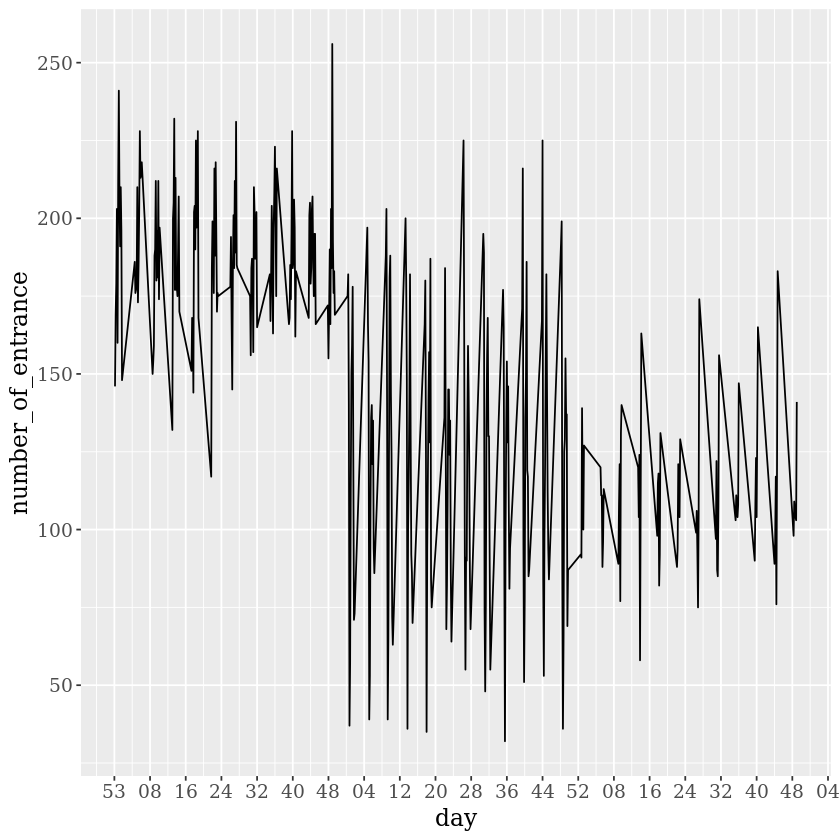

In [30]:
p <- ggplot(acceptance_dt_full_date_aggr, aes(x=day, y=number_of_entrance,group = 1)) +
  geom_line()+ theme(text=element_text(family="Garamond", size=14)) 
p + scale_x_date(date_breaks = "8 week", date_labels = "%W")


# Discharge Time series

In [39]:
discharge_dt <- data.frame(str_split_fixed(data$DATA_DIMISSIONE,"/",3))
colnames(discharge_dt) <- c('day', ' month', 'year')
d <- data.frame(str_split_fixed(discharge_dt$year," ",2))
colnames(d) <- c('year','hour')
discharge_dt$year <- d$year
discharge_dt$hour <- d$hour
head(discharge_dt,3)

day,month,year,hour
01,04,2019,13.04
01,04,2019,2.38
01,04,2019,20.01


In [40]:
discharge_dt_full_date <- data.frame(str_split_fixed(data$DATA_DIMISSIONE," ",2))
colnames(discharge_dt_full_date) <- c("day", "hour")
discharge_dt_full_date[1] <- lapply(discharge_dt_full_date[1], as.Date, format = "%m/%d/%Y")
head(discharge_dt_full_date,3)

day,hour
2019-01-04,13.04
2019-01-04,2.38
2019-01-04,20.01


In [42]:
discharge_dt_full_date<-aggregate(discharge_dt_full_date$day, by=list(discharge_dt_full_date$day), FUN=length)
colnames(discharge_dt_full_date) <-c("day","number_of_entrance")
head(discharge_dt_full_date,5)

day,number_of_entrance
2019-01-01,123
2019-01-02,183
2019-01-03,187
2019-01-04,190
2019-01-05,177


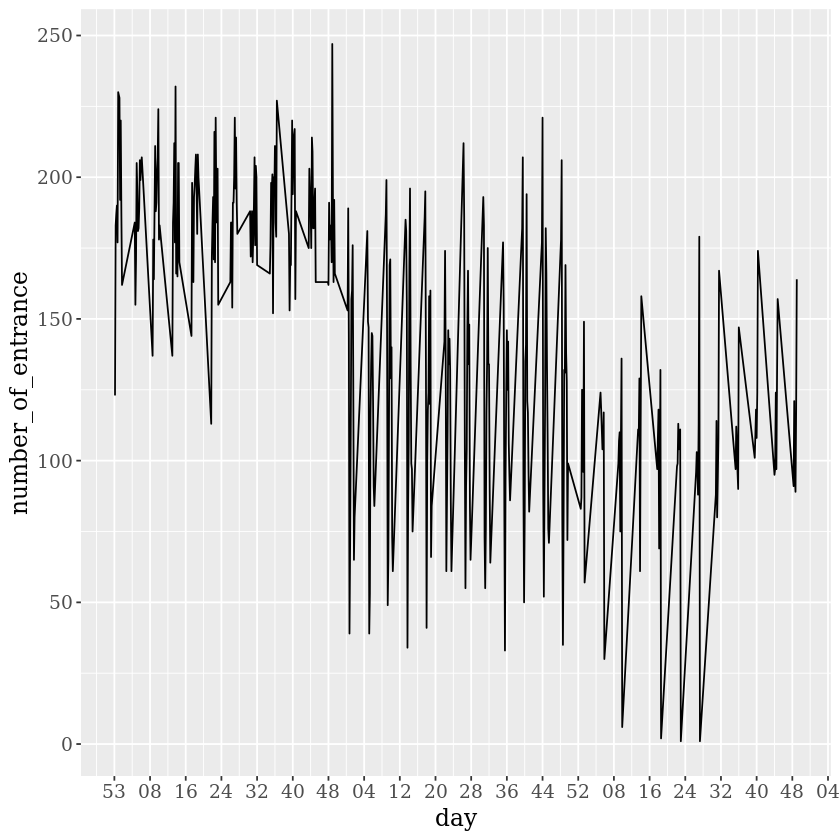

In [43]:
p <- ggplot(discharge_dt_full_date, aes(x=day, y=number_of_entrance,group = 1)) +
  geom_line()+ theme(text=element_text(family="Garamond", size=14)) 
p + scale_x_date(date_breaks = "8 week", date_labels = "%W")